In [1]:
import pandas as pd
import hashlib as hb

In [19]:
viscode_pd = pd.read_csv('./data/1092_viscode_logs.csv')

In [21]:
list(viscode_pd)

['_id',
 '_index',
 '_score',
 '_type',
 'cellId',
 'code',
 'codeLength',
 'errorName',
 'errorValue',
 'event',
 'isError',
 'kernelId',
 'lti.contextId',
 'lti.contextLable',
 'lti.contextTitle',
 'lti.email',
 'lti.firstName',
 'lti.lastName',
 'lti.locale',
 'lti.name',
 'lti.roles',
 'lti.username',
 'notebookName',
 'notebookPath',
 'text',
 'timestamp',
 'username']

In [3]:
### MD5
def md5(i):
    hl = hb.md5()
    
    hl.update(str(i).encode(encoding='utf-8'))

    #print('加密前為 ：' + str(i))
    #print('加密後為 ：' + hl.hexdigest())
    
    return hl.hexdigest()

In [4]:
viscode_pd['username'] = viscode_pd['username'].astype(str)
viscode_pd['username'] = viscode_pd['username'].apply(md5)

In [5]:
viscode_pd.head(5)

,_id,_index,_score,_type,cellId,code,codeLength,errorName,errorValue,event,...,lti.lastName,lti.locale,lti.name,lti.roles,lti.username,notebookName,notebookPath,text,timestamp,username
0,NIxRe3sBhZd_WuicrXaC,viscode,NaN,jupyter,NaN,NaN,NaN,NaN,NaN,notebook_open,...,張,zh_tw,張 介韋,Instructor,109522016,dictionary.ipynb,題庫/dictionary.ipynb,NaN,"Aug 25, 2021 @ 03:19:15.585",4281b43958059de8ff96710b6a2d947a
1,gkVRe3sB4yEMcndfrQdT,viscode,NaN,jupyter,NaN,NaN,"1,394",NaN,NaN,code_speed,...,張,zh_tw,張 介韋,Instructor,109522016,dictionary.ipynb,題庫/dictionary.ipynb,NaN,"Aug 25, 2021 @ 03:19:15.537",4281b43958059de8ff96710b6a2d947a
2,BoxRe3sBhZd_WuicHnYI,viscode,NaN,jupyter,NaN,NaN,NaN,NaN,NaN,tree_open,...,張,zh_tw,張 介韋,Instructor,109522016,NaN,NaN,NaN,"Aug 25, 2021 @ 03:18:38.852",4281b43958059de8ff96710b6a2d947a
3,gzxgXnsB4yEMcndfgGOR,viscode,NaN,jupyter,NaN,NaN,NaN,NaN,NaN,notebook_open,...,王,zh_tw,王 彥心,Learner,106408003,Untitled9.ipynb,Untitled9.ipynb,NaN,"Aug 19, 2021 @ 12:26:27.856",9879db96946fbb8a3e255ab8815c577e
4,JINgXnsBhZd_WuicgHhR,viscode,NaN,jupyter,NaN,NaN,1,NaN,NaN,code_speed,...,王,zh_tw,王 彥心,Learner,106408003,Untitled9.ipynb,Untitled9.ipynb,NaN,"Aug 19, 2021 @ 12:26:27.792",9879db96946fbb8a3e255ab8815c577e


In [6]:
list(viscode_pd)

['_id',
 '_index',
 '_score',
 '_type',
 'cellId',
 'code',
 'codeLength',
 'errorName',
 'errorValue',
 'event',
 'isError',
 'kernelId',
 'lti.contextId',
 'lti.contextLable',
 'lti.contextTitle',
 'lti.email',
 'lti.firstName',
 'lti.lastName',
 'lti.locale',
 'lti.name',
 'lti.roles',
 'lti.username',
 'notebookName',
 'notebookPath',
 'text',
 'timestamp',
 'username']

In [7]:
viscode_pd = viscode_pd[['username', 
                         'event', 
                         'codeLength',
                         'errorName']]

In [8]:
viscode_pd

,username,event,codeLength,errorName
0,4281b43958059de8ff96710b6a2d947a,notebook_open,NaN,NaN
1,4281b43958059de8ff96710b6a2d947a,code_speed,"1,394",NaN
2,4281b43958059de8ff96710b6a2d947a,tree_open,NaN,NaN
3,9879db96946fbb8a3e255ab8815c577e,notebook_open,NaN,NaN
4,9879db96946fbb8a3e255ab8815c577e,code_speed,1,NaN
...,...,...,...,...
27869,a23402a174a55c4211136df4425a724e,code_execution,NaN,NaN
27870,a23402a174a55c4211136df4425a724e,code_execution,NaN,NaN
27871,a23402a174a55c4211136df4425a724e,code_execution,NaN,NaN
27872,a23402a174a55c4211136df4425a724e,code_speed,"2,564",NaN


In [9]:
viscode_event_grouped = viscode_pd.groupby(['username', 'event']).size().reset_index()
viscode_event_grouped = viscode_event_grouped.pivot_table(0, ['username'], 'event').fillna(0).astype('int')
viscode_event_grouped

event,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open
username,,,,,,
0166b212722c86ab3ec1d7b4859101cd,42,49,27,297,4,3
081d3aeee0b521170940fc806c0addb3,18,37,7,167,1,1
0a715a568a054d7996fcbcbf17b36551,21,50,21,156,1,1
0c7b9053af0850d3eaa8b61de50a26cd,23,50,33,220,2,2
1924a60113fb281a6408abbe8f72a6fb,23,52,3,327,3,2
...,...,...,...,...,...,...
f8bb7ed0860701686be0bcaad12dcee6,0,4,2,3,1,1
f983f2690eb322bf066c136470e757c9,0,2,0,5,1,1
fbd8958c046be9d6fb0e2f4a61a3203c,10,17,18,33,4,4


In [10]:
viscode_error_grouped = viscode_pd.groupby(['username', 'errorName']).size().reset_index()
viscode_error_grouped = viscode_error_grouped.pivot_table(0, ['username'], 'errorName').fillna(0).astype('int')
viscode_error_grouped

errorName,AttributeError,ConversionError,FileExistsError,FileNotFoundError,IndentationError,IndexError,JSONDecodeError,KeyError,KeyboardInterrupt,LookupError,ModuleNotFoundError,NameError,OperationalError,SyntaxError,TabError,TypeError,UnboundLocalError,UnicodeDecodeError,ValueError,ZeroDivisionError
username,,,,,,,,,,,,,,,,,,,,
0166b212722c86ab3ec1d7b4859101cd,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0
081d3aeee0b521170940fc806c0addb3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0a715a568a054d7996fcbcbf17b36551,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
0c7b9053af0850d3eaa8b61de50a26cd,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1924a60113fb281a6408abbe8f72a6fb,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f0c4f08113a2bc5a9275dd881c616a92,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
f83882e0705489c3c0514fe226fdda4f,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0
fbd8958c046be9d6fb0e2f4a61a3203c,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0


In [11]:
def comma_to_int (x):
    x = str(x)
    x = x.replace(',', '')
    int(x)
    
    return x

In [12]:
viscode_pd['codeLength'] = viscode_pd['codeLength'].fillna(0).apply(comma_to_int)

In [13]:
viscode_codelen_grouped = viscode_pd[['username', 'codeLength']].groupby('username').max()

In [14]:
viscode_merged_pd = pd.concat([viscode_event_grouped, viscode_error_grouped, viscode_codelen_grouped], axis=1)

In [15]:
viscode_merged_pd = viscode_merged_pd.fillna(0)

In [16]:
viscode_merged_pd['username'] = viscode_merged_pd.index

In [17]:
viscode_merged_pd

,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AttributeError,ConversionError,FileExistsError,FileNotFoundError,...,OperationalError,SyntaxError,TabError,TypeError,UnboundLocalError,UnicodeDecodeError,ValueError,ZeroDivisionError,codeLength,username
username,,,,,,,,,,,,,,,,,,,,,
0166b212722c86ab3ec1d7b4859101cd,42,49,27,297,4,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,979,0166b212722c86ab3ec1d7b4859101cd
081d3aeee0b521170940fc806c0addb3,18,37,7,167,1,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,999,081d3aeee0b521170940fc806c0addb3
0a715a568a054d7996fcbcbf17b36551,21,50,21,156,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99,0a715a568a054d7996fcbcbf17b36551
0c7b9053af0850d3eaa8b61de50a26cd,23,50,33,220,2,2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,96,0c7b9053af0850d3eaa8b61de50a26cd
1924a60113fb281a6408abbe8f72a6fb,23,52,3,327,3,2,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,998,1924a60113fb281a6408abbe8f72a6fb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f8bb7ed0860701686be0bcaad12dcee6,0,4,2,3,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210,f8bb7ed0860701686be0bcaad12dcee6
f983f2690eb322bf066c136470e757c9,0,2,0,5,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4571,f983f2690eb322bf066c136470e757c9
fbd8958c046be9d6fb0e2f4a61a3203c,10,17,18,33,4,4,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2986,fbd8958c046be9d6fb0e2f4a61a3203c


In [18]:
viscode_merged_pd.to_csv('./output/viscode.csv',encoding='utf8', index=False)

<AxesSubplot:>

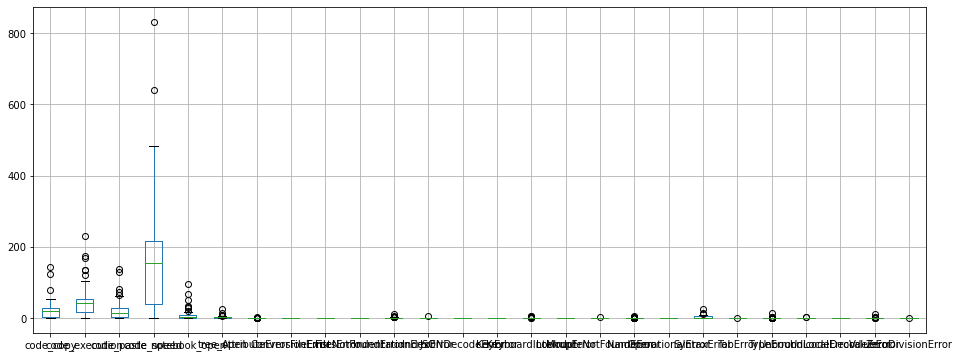

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
viscode_merged_pd.drop(['9879db96946fbb8a3e255ab8815c577e']).boxplot()